In [169]:
from collections import defaultdict
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from functools import partial

from mugato.data import ok_vqa
from mugato.utils import image_transform, as_tensor

random.seed(42)

def plot_embedding(xs, ys, zs, max_x=10, max_y=10, max_z=10):
    # Create a new figure and add a 3D subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the points
    ax.scatter(xs, ys, zs, c='red', marker='o')
    
    # Set axes limits
    ax.set_xlim(0, max_x)
    ax.set_ylim(0, max_y)
    ax.set_zlim(0, max_z)
    
    # Label the axes
    ax.set_xlabel('X ("A"-ness)')
    ax.set_ylabel('Y ("vowely"-ness)')
    ax.set_zlabel('Z ("lettery"-ness)')
    
    # Display the plot
    plt.show()

def imshow(image):
    fig, ax = plt.subplots()
    ax.imshow(image.permute(1, 2, 0))
    plt.show()

vqa_dataset = ok_vqa.initialize()
sample_index = 10
sample = vqa_dataset['train'][sample_index]
image = as_tensor(sample['image']) / 255

%matplotlib widget

# Embeddings

Are these two phrases similar?

In [170]:
word_1 = "a lake"
word_2 = "cloudy sky"

<details>

It depends on what conceptual idea you compare them.

They are both things you might see in a painting of a landscape.

One you can live in, the other you can't.

They both have the same number of letters

One has an 'h', the other doesn't.

</details>

In [171]:
# Helper functions to get "features" of our phrases.
def count_vowels(text):
    return len([c for c in text if c in 'aeiouy'])

def count_letter(letter, text):
    return len([c for c in text if c == letter])

count_A = partial(count_letter, 'a')
count_Y = partial(count_letter, 'y')

In [172]:
def example_embedding_1(text):
    """
    Embeds the text in a 3-dimensional space.
    [            x,                y,              z]
    [number of 'a', number of vowels, length of text]
    """
    x = count_A(text)
    y = count_vowels(text)
    z = len(text)
    return x, y, z

In [173]:
example_embedding_1("a lake")

(2, 3, 6)

In [174]:
example_embedding_1("cloudy sky")

(0, 4, 10)

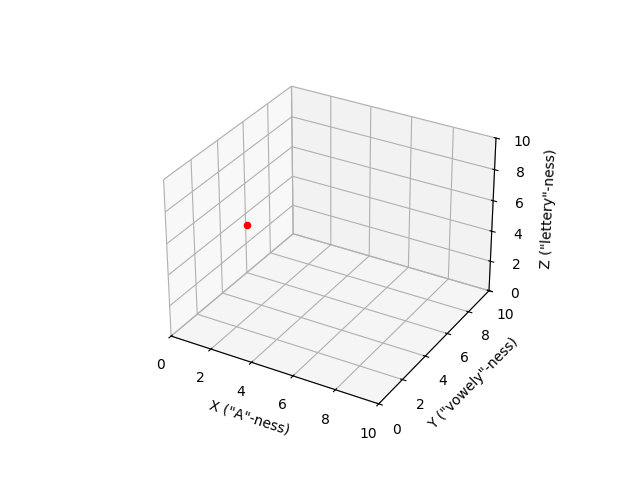

In [175]:
plot_embedding(*example_embedding_1('a lake'))

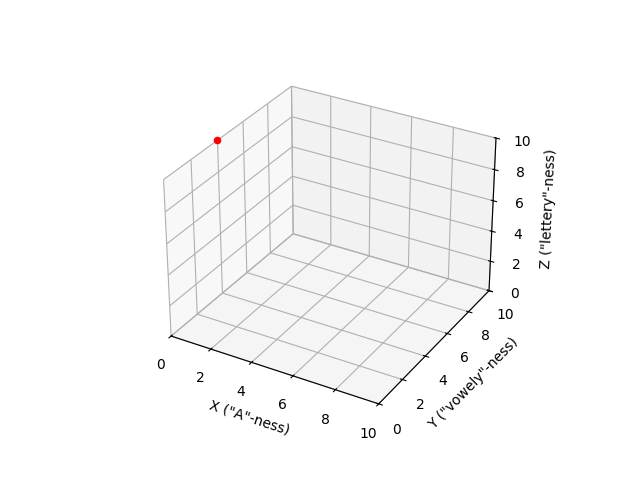

In [176]:
plot_embedding(*example_embedding_1('cloudy sky'))

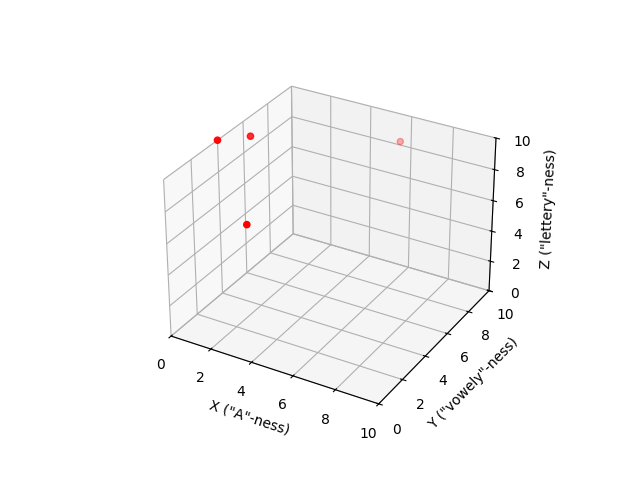

In [177]:
plot_embedding(*zip(
    example_embedding_1('a lake'),
    example_embedding_1('cloudy sky'),
    example_embedding_1('lazy mouse'),
    example_embedding_1('aaaaaayyy'),
))

In [186]:
# Miscellaneous setup
r = lambda: random.randint(0, 6)
embedding = defaultdict(lambda: [2, 2, 2])
embedding['a lake']     = [r(), r(), r()]
embedding['cloudy sky'] = [r(), r(), r()]
embedding['lazy mouse'] = [r(), r(), r()]
embedding['aaaaaayy']   = [r(), r(), r()]
embedding['a']          = [r(), r(), r()]
embedding['lake']       = [r(), r(), r()]

In [187]:
def example_embedding_2(text):
    """
    Embeds the text in a 3-dimensional space.
    [  x,   y,   z]
    [???, ???, ???]
    """
    return embedding[text]

In [152]:
for text in ['a lake', 'cloudy sky', 'lazy mouse', 'aaaaaayy']:
    print(f'{text:>10}: {example_embedding_2(text)}')

    a lake: [1, 1, 0]
cloudy sky: [2, 2, 1]
lazy mouse: [2, 2, 2]
  aaaaaayy: [2, 1, 3]


How would you move the "a lake" embedding closer to the "cloudy sky" embedding?

In [153]:
example_embedding_2('a lake')

[1, 1, 0]

In [154]:
example_embedding_2('cloudy sky')

[2, 2, 1]

In [155]:
# embedding['a lake'][0] += ...
# embedding['cloudy sky'][1] += ...

TypeError: unsupported operand type(s) for +=: 'int' and 'ellipsis'

In [ ]:
example_embedding_2('a lake'), example_embedding_2('cloudy sky')

In [194]:
foo_emb = nn.Embedding(5, 3)

In [198]:
foo_emb(torch.tensor([3]))

tensor([[-0.6237, -0.2044,  0.7080]], grad_fn=<EmbeddingBackward0>)

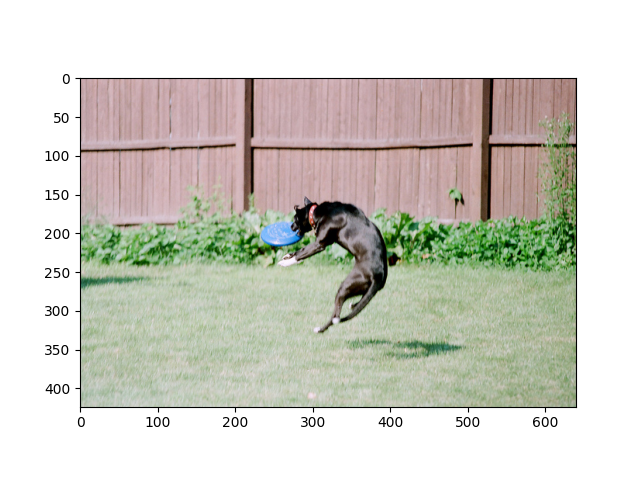

In [190]:
imshow(image)

In [189]:
def example_image_embedding(image):
    x = image[0].mean() * 5  # Red channel
    y = image[1].mean() * 5 # Green channel
    z = image[2].mean() * 5 # Blue channel
    return [x, y, z]

In [191]:
example_image_embedding(image)

[tensor(3.3682), tensor(3.3384), tensor(2.9908)]

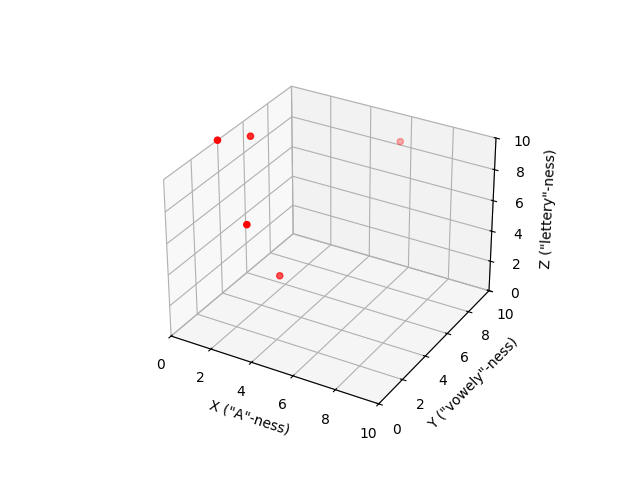

In [192]:
plot_embedding(*zip(
    example_embedding_1('a lake'),
    example_embedding_1('cloudy sky'),
    example_embedding_1('lazy mouse'),
    example_embedding_1('aaaaaayyy'),
    example_image_embedding(image),
))

Skip from here to...

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
embedder = TfidfVectorizer(max_features=4, analyzer='char')
embedder.fit(['a lake', 'cloudy sky', 'lazy mouse', 'aaaaaaiy']);

In [185]:
embedder.transform(['cloudy sky']).data

array([0.40824829, 0.40824829, 0.81649658])

In [186]:
# Miscellaneous setup
r = lambda: random.randint(0, 6)
embedding = defaultdict(lambda: [2, 2, 2])
embedding['a lake']     = [r(), r(), r()]
embedding['cloudy sky'] = [r(), r(), r()]
embedding['lazy mouse'] = [r(), r(), r()]
embedding['aaaaaayy']   = [r(), r(), r()]
embedding['a']          = [r(), r(), r()]
embedding['lake']       = [r(), r(), r()]

In [187]:
def example_embedding_3(text):
    """
    Embeds the text in a 3-dimensional space.
    [  x,   y,   z]
    [???, ???, ???]
    """
    return embedding[text]

In [152]:
for text in ['a lake', 'cloudy sky', 'lazy mouse', 'aaaaaayy']:
    print(f'{text:>10}: {example_embedding_3(text)}')

    a lake: [1, 1, 0]
cloudy sky: [2, 2, 1]
lazy mouse: [2, 2, 2]
  aaaaaayy: [2, 1, 3]


How would you move the "a lake" embedding closer to the "cloudy sky" embedding?

In [153]:
example_embedding_3('a lake')

[1, 1, 0]

In [154]:
example_embedding_3('cloudy sky')

[2, 2, 1]

In [155]:
embedding['a lake'][0] += ...
embedding['cloudy sky'][1] += ...

TypeError: unsupported operand type(s) for +=: 'int' and 'ellipsis'

In [ ]:
example_embedding_3('a lake'), example_embedding_3('cloudy sky')

...here

# Tokenization

In [156]:
def spaces_tokenizer(text):
    return text.split(' ')

In [157]:
spaces_tokenizer('a lake')

['a', 'lake']

In [158]:
spaces_tokenizer('aaaaaayy')

['aaaaaayy']

In [159]:
def example_tokenizer(text):
    words = text.split(' ')
    vocab = {
        'a': 0,
        'lake': 1,
        'cloudy': 2,
        'sky': 3,
        'lazy': 4,
        'mouse': 5,
        'aaaaaayy': 6,
    }
    return [
        vocab.get(word, 7)
        for word in words
    ]

In [160]:
example_tokenizer('cloudy sky')

[2, 3]

In [161]:
import tiktoken

In [162]:
tiktoken_tokenizer = tiktoken.get_encoding("r50k_base")

In [163]:
tiktoken_tokenizer.encode('cloudy sky')

[17721, 88, 6766]

In [164]:
print(f'{"token":>10}: {"text":>10}')

for token in tokenizer.text_tokenizer.encode("cloudy sky"):
    decoded = tokenizer.text_tokenizer.decode([token])
    print(f'{token:>10}: {decoded:>10}')

     token:       text


NameError: name 'tokenizer' is not defined

In [165]:
print(f'{"token":>10}: {"text":>10}')

for token in tokenizer.text_tokenizer.encode("Hello, abcDEF world!"):
    decoded = tokenizer.text_tokenizer.decode([token])
    print(f'{token:>10}: {decoded:>10}')

     token:       text


NameError: name 'tokenizer' is not defined

In [166]:
tokens = spaces_tokenizer('a lake')
embeddings = [
    example_embedding_3(token) for token in tokens
]
embeddings

[[5, 4, 0], [2, 6, 1]]

In [167]:
tokens = spaces_tokenizer('aaaaaayy')
embeddings = [
    example_embedding_3(token) for token in tokens
]
embeddings

[[2, 1, 3]]

## Tokenizing images

In [35]:
image = torch.ones((224, 224, 3))
image[:, :, 0] *= 0.25
image[:, :, 1] *= 0.50
image[:, :, 2] *= 0.75

In [36]:
plt.imshow(image)

In [108]:
import tiktoken
from mugato.tokenizer import Tokenizer

In [109]:
vqa_dataset = ok_vqa.initialize()

In [110]:
sample_index = 10
sample = vqa_dataset['train'][sample_index]

In [111]:
sample['question']

'Which breed of dog it this?'

In [112]:
spaces_tokenizer(sample['question'])

['Which', 'breed', 'of', 'dog', 'it', 'this?']

In [113]:
tokenizer.encode_text(sample['question'])

tensor([[13828],
        [15939],
        [  286],
        [ 3290],
        [  340],
        [  428],
        [   30]])

In [114]:
sample['answers'][0]

{'answer': 'doberman',
 'raw_answer': 'doberman',
 'answer_confidence': 'yes',
 'answer_id': 1}

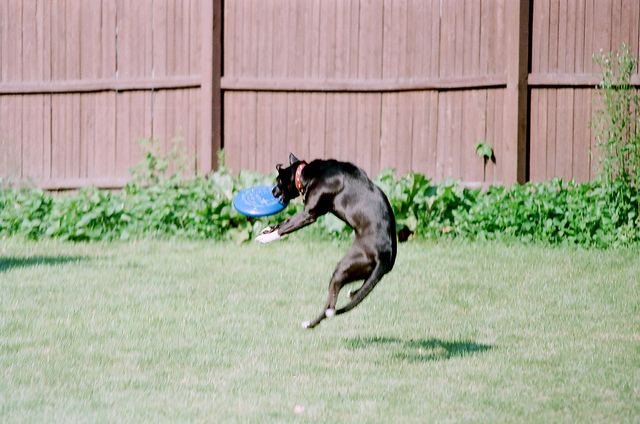

In [115]:
sample['image']

In [62]:
text_tokenizer = tiktoken.get_encoding("r50k_base")
tokenizer = Tokenizer(text_tokenizer)
vqa_dataloader = ok_vqa.create_dataloader(tokenizer, batch_size=4)
dlit = iter(vqa_dataloader);
next(dlit); next(dlit);

In [63]:
batch = next(dlit)

In [64]:
xs, ys, ms = batch

In [65]:
xs['question'][0]

tensor([[[ 5195],
         [  318],
         [  428],
         [  281],
         [  379],
         [ 4464],
         [  605],
         [  804],
         [  329],
         [ 2130],
         [ 5762],
         [  428],
         [16029],
         [   30],
         [    0],
         [    0],
         [    0],
         [    0],
         [    0],
         [    0],
         [    0]]])

In [66]:
tokenizer.decode_text(xs['question'][0].squeeze())

'Why is this an atypical look for someone wearing this makeup?!!!!!!!'

In [50]:
xs['answer'][0]

tensor([[[50256],
         [   79],
         [ 1647],
         [ 7894]]])

In [42]:
xs['question']

tensor([[[[ 2061],
          [  318],
          [  262],
          [42658],
          [ 2349],
          [  286],
          [  262],
          [32749],
          [ 1444],
          [   30],
          [    0],
          [    0],
          [    0],
          [    0]]],


        [[[ 2437],
          [ 1468],
          [  466],
          [  345],
          [  423],
          [  284],
          [  307],
          [  287],
          [  460],
          [ 4763],
          [  284],
          [  466],
          [  428],
          [   30]]],


        [[[ 6090],
          [  345],
          [ 4724],
          [  262],
          [ 1295],
          [  810],
          [  262],
          [  582],
          [  318],
          [ 2712],
          [   30],
          [    0],
          [    0],
          [    0]]],


        [[[13828],
          [ 6787],
          [ 1664],
          [  318],
          [ 3706],
          [  706],
          [  257],
          [ 3240],
          [  287],
          [  649],
